In [1]:
# # test parallel computing
# import psutil
# # logical=True counts threads, but we are interested in cores
# psutil.()# .cpu_count(logical=False)
%load_ext line_profiler
%matplotlib inline
import functools
from libs import *
from sklearn.metrics.pairwise import rbf_kernel
from joblib import Parallel, delayed
import multiprocessing

from pygraph.kernels.spKernel import spkernel
from pygraph.utils.kernels import deltakernel, kernelsum

num_cores = multiprocessing.cpu_count()

dslist = [   
    {'name': 'Acyclic', 'dataset': '../datasets/acyclic/dataset_bps.ds', 'task': 'regression'}, # node symb
#     {'name': 'COIL-DEL', 'dataset': '../datasets/COIL-DEL/COIL-DEL_A.txt'}, # edge symb, node nsymb
    {'name': 'PAH', 'dataset': '../datasets/PAH/dataset.ds',}, # unlabeled
    {'name': 'MAO', 'dataset': '../datasets/MAO/dataset.ds',}, # node/edge symb
    {'name': 'MUTAG', 'dataset': '../datasets/MUTAG/MUTAG.mat',
        'extra_params': {'am_sp_al_nl_el': [0, 0, 3, 1, 2]}}, # node/edge symb
    {'name': 'Alkane', 'dataset': '../datasets/Alkane/dataset.ds', 'task': 'regression', 
        'dataset_y': '../datasets/Alkane/dataset_boiling_point_names.txt',}, # contains single node graph, node symb
#     {'name': 'BZR', 'dataset': '../datasets/BZR_txt/BZR_A_sparse.txt'}, # node symb/nsymb
#     {'name': 'COX2', 'dataset': '../datasets/COX2_txt/COX2_A_sparse.txt'}, # node symb/nsymb
    {'name': 'Mutagenicity', 'dataset': '../datasets/Mutagenicity/Mutagenicity_A.txt'}, # node/edge symb
    {'name': 'ENZYMES', 'dataset': '../datasets/ENZYMES_txt/ENZYMES_A_sparse.txt'}, # node symb/nsymb
#     {'name': 'Fingerprint', 'dataset': '../datasets/Fingerprint/Fingerprint_A.txt'},
    {'name': 'Letter-med', 'dataset': '../datasets/Letter-med/Letter-med_A.txt'},
#     {'name': 'DHFR', 'dataset': '../datasets/DHFR_txt/DHFR_A_sparse.txt'}, # node symb/nsymb
#     {'name': 'SYNTHETIC', 'dataset': '../datasets/SYNTHETIC_txt/SYNTHETIC_A_sparse.txt'}, # node symb/nsymb
#     {'name': 'MSRC9', 'dataset': '../datasets/MSRC_9_txt/MSRC_9_A.txt'}, # node symb
#     {'name': 'MSRC21', 'dataset': '../datasets/MSRC_21_txt/MSRC_21_A.txt'}, # node symb
#     {'name': 'FIRSTMM_DB', 'dataset': '../datasets/FIRSTMM_DB/FIRSTMM_DB_A.txt'}, # node symb/nsymb ,edge nsymb

#     {'name': 'PROTEINS', 'dataset': '../datasets/PROTEINS_txt/PROTEINS_A_sparse.txt'}, # node symb/nsymb
#     {'name': 'PROTEINS_full', 'dataset': '../datasets/PROTEINS_full_txt/PROTEINS_full_A_sparse.txt'}, # node symb/nsymb
    {'name': 'D&D', 'dataset': '../datasets/D&D/DD.mat',
     'extra_params': {'am_sp_al_nl_el': [0, 1, 2, 1, -1]}}, # node symb
#     {'name': 'AIDS', 'dataset': '../datasets/AIDS/AIDS_A.txt'}, # node symb/nsymb, edge symb
#     {'name': 'NCI1', 'dataset': '../datasets/NCI1/NCI1.mat',
#         'extra_params': {'am_sp_al_nl_el': [1, 1, 2, 0, -1]}}, # node symb
#     {'name': 'NCI109', 'dataset': '../datasets/NCI109/NCI109.mat',
#         'extra_params': {'am_sp_al_nl_el': [1, 1, 2, 0, -1]}}, # node symb
#     {'name': 'NCI-HIV', 'dataset': '../datasets/NCI-HIV/AIDO99SD.sdf',
#         'dataset_y': '../datasets/NCI-HIV/aids_conc_may04.txt',}, # node/edge symb
    
#     # not working below
#     {'name': 'PTC_FM', 'dataset': '../datasets/PTC/Train/FM.ds',},
#     {'name': 'PTC_FR', 'dataset': '../datasets/PTC/Train/FR.ds',},
#     {'name': 'PTC_MM', 'dataset': '../datasets/PTC/Train/MM.ds',},
#     {'name': 'PTC_MR', 'dataset': '../datasets/PTC/Train/MR.ds',},
]
estimator = spkernel
mixkernel = functools.partial(kernelsum, deltakernel, rbf_kernel)
param_grid_precomputed = {'node_kernels': [{'symb': deltakernel, 'nsymb': rbf_kernel, 'mix': mixkernel}]}
param_grid = [{'C': np.logspace(-10, 10, num = 41, base = 10)}, 
              {'alpha': np.logspace(-10, 10, num = 41, base = 10)}]
    
def compute_ds(ds):
    print()
    print(ds['name'])
    model_selection_for_precomputed_kernel(
        ds['dataset'], estimator, param_grid_precomputed, 
        (param_grid[1] if ('task' in ds and ds['task'] == 'regression') else param_grid[0]), 
        (ds['task'] if 'task' in ds else 'classification'), NUM_TRIALS=30,
        datafile_y=(ds['dataset_y'] if 'dataset_y' in ds else None),
        extra_params=(ds['extra_params'] if 'extra_params' in ds else None),
        ds_name=ds['name'])
    
#     %lprun -f spkernel \
#         model_selection_for_precomputed_kernel( \
#             ds['dataset'], estimator, param_grid_precomputed, \
#             (param_grid[1] if ('task' in ds and ds['task'] == 'regression') else param_grid[0]), \
#             (ds['task'] if 'task' in ds else 'classification'), NUM_TRIALS=30, \
#             datafile_y=(ds['dataset_y'] if 'dataset_y' in ds else None), \
#             extra_params=(ds['extra_params'] if 'extra_params' in ds else None))
    print()
    
Parallel(n_jobs=num_cores, verbose=10)(delayed(compute_ds)(ds) for ds in dslist)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   9 | elapsed:  2.8min remaining:  9.9min
[Parallel(n_jobs=8)]: Done   3 out of   9 | elapsed:  3.2min remaining:  6.4min
[Parallel(n_jobs=8)]: Done   4 out of   9 | elapsed:  4.0min remaining:  5.0min
[Parallel(n_jobs=8)]: Done   5 out of   9 | elapsed:  7.9min remaining:  6.3min
[Parallel(n_jobs=8)]: Done   6 out of   9 | elapsed: 147.0min remaining: 73.5min
[Parallel(n_jobs=8)]: Done   7 out of   9 | elapsed: 397.8min remaining: 113.7min
[Parallel(n_jobs=8)]: Done   9 out of   9 | elapsed: 1098.6min remaining:    0.0s


KeyboardInterrupt: 


Acyclic

--- This is a regression problem ---


I. Loading dataset from file...

2. Calculating gram matrices. This could take a while...

 None edge weight specified. Set all weight to 1.


 --- shortest path kernel matrix of size 183 built in 3.4878082275390625 seconds ---

the gram matrix with parameters {'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}} is: 
[[1.         0.47140452 0.33333333 ... 0.30151134 0.30512858 0.27852425]
 [0.47140452 1.         0.         ... 0.14213381 0.11986583 0.17232809]
 [0.33333333 0.         1.         ... 0.36851387 0.37293493 0.34815531]
 ...
 [0.30151134 0.14213381 0.36851387 ... 1.         0.96429344 0.95175317]
 [0.30512858 0.11986583 0.37293493 ... 0.96429344 1.         0.96671243]
 [0.27852425 0.17232809 0.34815531

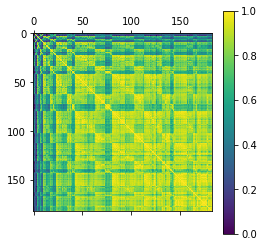


1 gram matrices are calculated, 0 of which are ignored.

3. Fitting and predicting using nested cross validation. This could really take a while...


/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ljia/.local/lib/python3.5/site-package


4. Getting final performance...
best_params_out:  [{'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}}]
best_params_in:  [{'alpha': 0.01}]

best_val_perf:  10.48016704845543
best_val_std:  0.4581423960367689
final_performance:  [11.856860325044012]
final_confidence:  [1.6523186100392606]
train_performance: [7.279597258509724]
train_std:  [0.24128809947271068]

time to calculate gram matrix with different hyper-params: 3.49±nans
time to calculate best gram matrix: 3.49±nans
total training time with all hyper-param choices: 46.81s

params                                                                                                                                                                                                                                    

/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



 --- shortest path kernel matrix of size 149 built in 3.3240325450897217 seconds ---

the gram matrix with parameters {'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}} is: 
[[1.         0.89442719 0.70710678 ... 0.47902167 0.46852129 0.53311399]
 [0.89442719 1.         0.9486833  ... 0.642675   0.62858727 0.68875683]
 [0.70710678 0.9486833  1.         ... 0.67743894 0.66258916 0.71205164]
 ...
 [0.47902167 0.642675   0.67743894 ... 1.         0.99747487 0.97420128]
 [0.46852129 0.62858727 0.66258916 ... 0.99747487 1.         0.96209727]
 [0.53311399 0.68875683 0.71205164 ... 0.97420128 0.96209727 1.        ]]


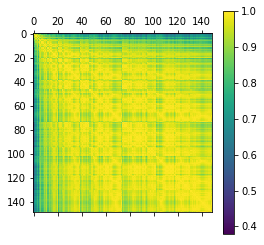


1 gram matrices are calculated, 0 of which are ignored.

3. Fitting and predicting using nested cross validation. This could really take a while...


/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ljia/.local/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/ljia/.local/lib/python3.5/site-package


4. Getting final performance...
best_params_out:  [{'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}}]
best_params_in:  [{'alpha': 0.03162277660168379}]

best_val_perf:  8.650257813261417
best_val_std:  0.42968288406182015
final_performance:  [9.361116361154078]
final_confidence:  [2.218550782316567]
train_performance: [7.8343217840551755]
train_std:  [0.25589398275456354]

time to calculate gram matrix with different hyper-params: 3.32±nans
time to calculate best gram matrix: 3.32±nans
total training time with all hyper-param choices: 30.35s

params                                                                                                                                                                                                                     


2. Calculating gram matrices. This could take a while...

 None edge weight specified. Set all weight to 1.


 --- shortest path kernel matrix of size 68 built in 7.607230186462402 seconds ---

the gram matrix with parameters {'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}} is: 
[[1.         0.98449615 0.91863253 ... 0.90803004 0.88073949 0.74163265]
 [0.98449615 1.         0.96352874 ... 0.95770189 0.93322371 0.82803429]
 [0.91863253 0.96352874 1.         ... 0.98530439 0.97703823 0.92845585]
 ...
 [0.90803004 0.95770189 0.98530439 ... 1.         0.99204562 0.94363326]
 [0.88073949 0.93322371 0.97703823 ... 0.99204562 1.         0.96718938]
 [0.74163265 0.82803429 0.92845585 ... 0.94363326 0.96718938 1.        ]]


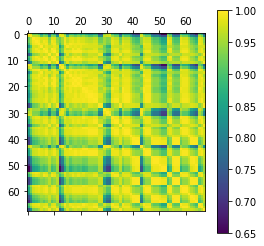


1 gram matrices are calculated, 0 of which are ignored.

3. Fitting and predicting using nested cross validation. This could really take a while...

4. Getting final performance...
best_params_out:  [{'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}}]
best_params_in:  [{'C': 3.1622776601683795}]

best_val_perf:  0.5635714285714286
best_val_std:  0.020692049669866652
final_performance:  [0.5376190476190476]
final_confidence:  [0.07997917861814137]
train_performance: [0.5574466891133556]
train_std:  [0.008328075153960232]

time to calculate gram matrix with different hyper-params: 7.61±nans
time to calculate best gram matrix: 7.61±nans
total training time with all hyper-param choices: 9.71s

params                                                                


2. Calculating gram matrices. This could take a while...

 None edge weight specified. Set all weight to 1.


 --- shortest path kernel matrix of size 94 built in 6.5481321811676025 seconds ---

the gram matrix with parameters {'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}} is: 
[[1.         0.96353531 0.96592281 ... 0.8622094  0.87997676 0.87988951]
 [0.96353531 1.         0.9971178  ... 0.96212799 0.97024435 0.97178508]
 [0.96592281 0.9971178  1.         ... 0.95944325 0.96816017 0.97260121]
 ...
 [0.8622094  0.96212799 0.95944325 ... 1.         0.99889548 0.99345489]
 [0.87997676 0.97024435 0.96816017 ... 0.99889548 1.         0.9934214 ]
 [0.87988951 0.97178508 0.97260121 ... 0.99345489 0.9934214  1.        ]]


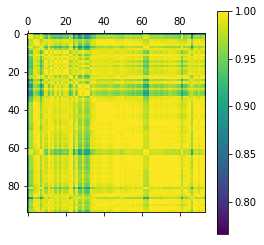


1 gram matrices are calculated, 0 of which are ignored.

3. Fitting and predicting using nested cross validation. This could really take a while...

4. Getting final performance...
best_params_out:  [{'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}}, {'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}}]
best_params_in:  [{'C': 31.622776601683793}, {'C': 100.0}]

best_val_perf:  0.6420833333333335
best_val_std:  0.015945233736988702
final_performance:  [0.6130000000000001, 0.6133333333333334]
final_confidence:  [0.1274457288146741, 0.1


2. Calculating gram matrices. This could take a while...

 None edge weight specified. Set all weight to 1.


 --- shortest path kernel matrix of size 188 built in 67.91289067268372 seconds ---

the gram matrix with parameters {'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}} is: 
[[1.         0.68780488 0.977912   ... 0.72072063 0.79304207 0.6640214 ]
 [0.68780488 1.         0.72921233 ... 0.79419383 0.80547177 0.77837484]
 [0.977912   0.72921233 1.         ... 0.79338054 0.87106629 0.74397578]
 ...
 [0.72072063 0.79419383 0.79338054 ... 1.         0.95662951 0.94918589]
 [0.79304207 0.80547177 0.87106629 ... 0.95662951 1.         0.93460209]
 [0.6640214  0.77837484 0.74397578 ... 0.94918589 0.93460209 1.        ]]


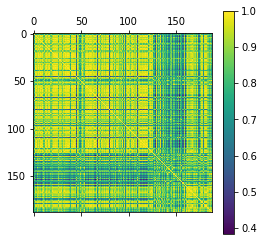


1 gram matrices are calculated, 0 of which are ignored.

3. Fitting and predicting using nested cross validation. This could really take a while...

4. Getting final performance...
best_params_out:  [{'n_jobs': 8, 'node_kernels': {'mix': functools.partial(<function kernelsum at 0x7f8e59cb7048>, <function deltakernel at 0x7f8e59ddf048>, <function rbf_kernel at 0x7f8e5d3560d0>), 'symb': <function deltakernel at 0x7f8e59ddf048>, 'nsymb': <function rbf_kernel at 0x7f8e5d3560d0>}}]
best_params_in:  [{'C': 0.1}]

best_val_perf:  0.7621936274509803
best_val_std:  0.019636735759586195
final_performance:  [0.8019298245614036]
final_confidence:  [0.09742587536592802]
train_performance: [0.7818095688567825]
train_std:  [0.015873629836738855]

time to calculate gram matrix with different hyper-params: 67.91±nans
time to calculate best gram matrix: 67.91±nans
total training time with all hyper-param choices: 71.04s

params                                                                            


2. Calculating gram matrices. This could take a while...

 None edge weight specified. Set all weight to 1.


 9 graphs are removed as they don't contain edges.



In [ ]:
%load_ext line_profiler
%matplotlib inline
import functools
from libs import *
import multiprocessing
from sklearn.metrics.pairwise import rbf_kernel

from pygraph.kernels.spKernel import spkernel
from pygraph.utils.kernels import deltakernel, kernelsum

dslist = [   
    {'name': 'Acyclic', 'dataset': '../datasets/acyclic/dataset_bps.ds', 'task': 'regression'}, # node symb
    {'name': 'Alkane', 'dataset': '../datasets/Alkane/dataset.ds', 'task': 'regression', 
        'dataset_y': '../datasets/Alkane/dataset_boiling_point_names.txt',}, # contains single node graph, node symb
    {'name': 'MAO', 'dataset': '../datasets/MAO/dataset.ds',}, # node/edge symb
    {'name': 'PAH', 'dataset': '../datasets/PAH/dataset.ds',}, # unlabeled
    {'name': 'MUTAG', 'dataset': '../datasets/MUTAG/MUTAG.mat',
        'extra_params': {'am_sp_al_nl_el': [0, 0, 3, 1, 2]}}, # node/edge symb
    {'name': 'Letter-med', 'dataset': '../datasets/Letter-med/Letter-med_A.txt'},
    {'name': 'ENZYMES', 'dataset': '../datasets/ENZYMES_txt/ENZYMES_A_sparse.txt'}, # node symb/nsymb
    {'name': 'Mutagenicity', 'dataset': '../datasets/Mutagenicity/Mutagenicity_A.txt'}, # node/edge symb
    {'name': 'D&D', 'dataset': '../datasets/D&D/DD.mat',
        'extra_params': {'am_sp_al_nl_el': [0, 1, 2, 1, -1]}}, # node symb

# # #     {'name': 'COIL-DEL', 'dataset': '../datasets/COIL-DEL/COIL-DEL_A.txt'}, # edge symb, node nsymb
# # #     {'name': 'BZR', 'dataset': '../datasets/BZR_txt/BZR_A_sparse.txt'}, # node symb/nsymb
# # #     {'name': 'COX2', 'dataset': '../datasets/COX2_txt/COX2_A_sparse.txt'}, # node symb/nsymb
#     {'name': 'Fingerprint', 'dataset': '../datasets/Fingerprint/Fingerprint_A.txt'},
#     
# #     {'name': 'DHFR', 'dataset': '../datasets/DHFR_txt/DHFR_A_sparse.txt'}, # node symb/nsymb
# #     {'name': 'SYNTHETIC', 'dataset': '../datasets/SYNTHETIC_txt/SYNTHETIC_A_sparse.txt'}, # node symb/nsymb
# #     {'name': 'MSRC9', 'dataset': '../datasets/MSRC_9_txt/MSRC_9_A.txt'}, # node symb
# #     {'name': 'MSRC21', 'dataset': '../datasets/MSRC_21_txt/MSRC_21_A.txt'}, # node symb
# #     {'name': 'FIRSTMM_DB', 'dataset': '../datasets/FIRSTMM_DB/FIRSTMM_DB_A.txt'}, # node symb/nsymb ,edge nsymb

# #     {'name': 'PROTEINS', 'dataset': '../datasets/PROTEINS_txt/PROTEINS_A_sparse.txt'}, # node symb/nsymb
# #     {'name': 'PROTEINS_full', 'dataset': '../datasets/PROTEINS_full_txt/PROTEINS_full_A_sparse.txt'}, # node symb/nsymb
# #     {'name': 'AIDS', 'dataset': '../datasets/AIDS/AIDS_A.txt'}, # node symb/nsymb, edge symb
#     {'name': 'NCI1', 'dataset': '../datasets/NCI1/NCI1.mat',
#         'extra_params': {'am_sp_al_nl_el': [1, 1, 2, 0, -1]}}, # node symb
#     {'name': 'NCI109', 'dataset': '../datasets/NCI109/NCI109.mat',
#         'extra_params': {'am_sp_al_nl_el': [1, 1, 2, 0, -1]}}, # node symb
#     {'name': 'NCI-HIV', 'dataset': '../datasets/NCI-HIV/AIDO99SD.sdf',
#         'dataset_y': '../datasets/NCI-HIV/aids_conc_may04.txt',}, # node/edge symb
    
#     # not working below
#     {'name': 'PTC_FM', 'dataset': '../datasets/PTC/Train/FM.ds',},
#     {'name': 'PTC_FR', 'dataset': '../datasets/PTC/Train/FR.ds',},
#     {'name': 'PTC_MM', 'dataset': '../datasets/PTC/Train/MM.ds',},
#     {'name': 'PTC_MR', 'dataset': '../datasets/PTC/Train/MR.ds',},
]
estimator = spkernel
mixkernel = functools.partial(kernelsum, deltakernel, rbf_kernel)
param_grid_precomputed = {'node_kernels': [{'symb': deltakernel, 'nsymb': rbf_kernel, 'mix': mixkernel}]}
param_grid = [{'C': np.logspace(-10, 10, num = 41, base = 10)}, 
              {'alpha': np.logspace(-10, 10, num = 41, base = 10)}]

for ds in dslist:
    print()
    print(ds['name'])
    model_selection_for_precomputed_kernel(
        ds['dataset'], 
        estimator, 
        param_grid_precomputed, 
        (param_grid[1] if ('task' in ds and ds['task'] == 'regression') else param_grid[0]), 
        (ds['task'] if 'task' in ds else 'classification'), 
        NUM_TRIALS=30,
        datafile_y=(ds['dataset_y'] if 'dataset_y' in ds else None),
        extra_params=(ds['extra_params'] if 'extra_params' in ds else None),
        ds_name=ds['name'],
        n_jobs=multiprocessing.cpu_count())
    
#     %lprun -f model_selection_for_precomputed_kernel \
#         model_selection_for_precomputed_kernel( \
#             ds['dataset'], \
#             estimator, \
#             param_grid_precomputed, \
#             (param_grid[1] if ('task' in ds and ds['task'] == 'regression') else param_grid[0]), \
#             (ds['task'] if 'task' in ds else 'classification'), \
#             NUM_TRIALS=30, \
#             datafile_y=(ds['dataset_y'] if 'dataset_y' in ds else None), \
#             extra_params=(ds['extra_params'] if 'extra_params' in ds else None), \
#             ds_name=ds['name'], \
#             n_jobs=multiprocessing.cpu_count()) 
    print()

In [1]:
%load_ext line_profiler
%matplotlib inline
import numpy as np
import sys
sys.path.insert(0, "../")
from pygraph.utils.model_selection_precomputed import model_selection_for_precomputed_kernel
from pygraph.kernels.spKernel import spkernel

datafile = '../../../../datasets/acyclic/Acyclic/dataset_bps.ds'
estimator = spkernel
param_grid_precomputed = {}
param_grid = {'alpha': np.logspace(-1, 1, num = 41, base = 10)}

model_selection_for_precomputed_kernel(datafile, estimator, param_grid_precomputed, param_grid, 
                                       'regression', NUM_TRIALS=30)


--- This is a regression problem ---


I. Loading dataset from file...

2. Calculating gram matrices. This could take a while...

 None edge weight specified. Set all weight to 1.



TypeError: 'NoneType' object is not subscriptable

Process ForkPoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [1]:
%load_ext line_profiler

import sys
sys.path.insert(0, "../")
from pygraph.utils.utils import kernel_train_test
from pygraph.kernels.spKernel import spkernel

datafile = '../../../../datasets/acyclic/Acyclic/dataset_bps.ds'
kernel_file_path = 'kernelmatrices_path_acyclic/'

kernel_para = dict(edge_weight = 'atom')

kernel_train_test(datafile, kernel_file_path, spkernel, kernel_para, normalize = False)

# %lprun -f spkernel \
#     kernel_train_test(datafile, kernel_file_path, spkernel, kernel_para, normalize = False)


 --- This is a regression problem ---


 Loading dataset from file...

 Calculating kernel matrix, this could take a while...
--- shortest path kernel matrix of size 185 built in 13.3865065574646 seconds ---
[[ 3.  1.  3. ...  1.  1.  1.]
 [ 1.  6.  1. ...  0.  0.  3.]
 [ 3.  1.  3. ...  1.  1.  1.]
 ...
 [ 1.  0.  1. ... 55. 21.  7.]
 [ 1.  0.  1. ... 21. 55.  7.]
 [ 1.  3.  1. ...  7.  7. 55.]]

 Starting calculate accuracy/rmse...
calculate performance:  94%|█████████▎| 936/1000 [00:01<00:00, 757.54it/s]
 Mean performance on train set: 28.360361
With standard deviation: 1.357183

 Mean performance on test set: 35.191954
With standard deviation: 4.495767
calculate performance: 100%|██████████| 1000/1000 [00:01<00:00, 771.22it/s]


  rmse_test    std_test    rmse_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
     35.192     4.49577       28.3604      1.35718   13.3865


In [ ]:
# results

# with y normalization
  RMSE_test    std_test    RMSE_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
    35.6337     5.23183       32.3805      3.92531   14.9301

# without y normalization
  RMSE_test    std_test    RMSE_train    std_train    k_time
-----------  ----------  ------------  -----------  --------
     35.192     4.49577       28.3604      1.35718   14.5768

In [5]:
# Author: Elisabetta Ghisu

"""
- This script take as input a kernel matrix
and returns the classification or regression performance
- The kernel matrix can be calculated using any of the graph kernels approaches
- The criteria used for prediction are SVM for classification and kernel Ridge regression for regression
- For predition we divide the data in training, validation and test. For each split, we first train on the train data, 
then evaluate the performance on the validation. We choose the optimal parameters for the validation set and finally
provide the corresponding performance on the test set. If more than one split is performed, the final results 
correspond to the average of the performances on the test sets. 

@references
    https://github.com/eghisu/GraphKernels/blob/master/GraphKernelsCollection/python_scripts/compute_perf_gk.py
"""

print(__doc__)

import sys
import pathlib
sys.path.insert(0, "../")
from tabulate import tabulate

import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.kernel_ridge import KernelRidge # 0.17
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn import svm

from pygraph.kernels.spkernel import spkernel
from pygraph.utils.graphfiles import loadDataset

print('\n Loading dataset from file...')
dataset, y = loadDataset("../../../../datasets/acyclic/Acyclic/dataset_bps.ds")
y = np.array(y)
print(y)

kernel_file_path = 'kernelmatrix.ds'
path = pathlib.Path(kernel_file_path)
if path.is_file():
    print('\n Loading the matrix from file...')
    Kmatrix = np.loadtxt(kernel_file_path)
    print(Kmatrix)
else:
    print('\n Calculating kernel matrix, this could take a while...')
    #@Q: is it appropriate to use bond type between atoms as the edge weight to calculate shortest path????????
    Kmatrix, run_time = spkernel(dataset, edge_weight = 'bond_type')
    print(Kmatrix)
    print('Saving kernel matrix to file...')
    np.savetxt(kernel_file_path, Kmatrix)

# setup the parameters
model_type = 'regression' # Regression or classification problem
print('\n --- This is a %s problem ---' % model_type)

datasize = len(dataset)
trials = 21 # Trials for hyperparameters random search
splits = 10 # Number of splits of the data
alpha_grid = np.logspace(-10, 10, num = trials, base = 10) # corresponds to (2*C)^-1 in other linear models such as LogisticRegression
C_grid = np.logspace(-10, 10, num = trials, base = 10)
random.seed(20) # Set the seed for uniform parameter distribution


"""
-  Here starts the main program
-  First we permute the data, then for each split we evaluate corresponding performances
-  In the end, the performances are averaged over the test sets
"""

# Initialize the performance of the best parameter trial on validation with the corresponding performance on test
val_split = []
test_split = []

# For each split of the data
for j in range(10, 10 + splits):
    print('\n Starting split %d...' % j)

    # Set the random set for data permutation
    random_state = int(j)
    np.random.seed(random_state)
    idx_perm = np.random.permutation(datasize)
#     print(idx_perm)
    
    # Permute the data
    y_perm = y[idx_perm] # targets permutation
#     print(y_perm)
    Kmatrix_perm = Kmatrix[:, idx_perm] # inputs permutation
#     print(Kmatrix_perm)
    Kmatrix_perm = Kmatrix_perm[idx_perm, :] # inputs permutation
    
    # Set the training, validation and test
    # Note: the percentage can be set up by the user
    num_train_val = int((datasize * 90) / 100)         # 90% (of entire dataset) for training and validation
    num_test = datasize - num_train_val              # 10% (of entire dataset) for test
    num_train = int((num_train_val * 90) / 100) # 90% (of train + val) for training
    num_val = num_train_val - num_train # 10% (of train + val) for validation
    
    # Split the kernel matrix
    Kmatrix_train = Kmatrix_perm[0:num_train, 0:num_train]
    Kmatrix_val = Kmatrix_perm[num_train:(num_train + num_val), 0:num_train]
    Kmatrix_test = Kmatrix_perm[(num_train + num_val):datasize, 0:num_train]

    # Split the targets
    y_train = y_perm[0:num_train]

    # Normalization step (for real valued targets only)
    print('\n Normalizing output y...')
    if model_type == 'regression':
        y_train_mean = np.mean(y_train)
        y_train_std = np.std(y_train)
        y_train = (y_train - y_train_mean) / float(y_train_std)
#         print(y)
        
    y_val = y_perm[num_train:(num_train + num_val)]
    y_test = y_perm[(num_train + num_val):datasize]
    
    # Record the performance for each parameter trial respectively on validation and test set
    perf_all_val = []
    perf_all_test = []
    
    # For each parameter trial
    for i in range(trials):
        # For regression use the Kernel Ridge method
        if model_type == 'regression':
#             print('\n Starting experiment for trial %d and parameter alpha = %3f\n ' % (i, alpha_grid[i]))

            # Fit the kernel ridge model
            KR = KernelRidge(kernel = 'precomputed', alpha = alpha_grid[i])
#             KR = svm.SVR(kernel = 'precomputed', C = C_grid[i])
            KR.fit(Kmatrix_train, y_train)

            # predict on the validation and test set
            y_pred = KR.predict(Kmatrix_val)
            y_pred_test = KR.predict(Kmatrix_test)
#             print(y_pred)

            # adjust prediction: needed because the training targets have been normalizaed
            y_pred = y_pred * float(y_train_std) + y_train_mean
#             print(y_pred)
            y_pred_test = y_pred_test * float(y_train_std) + y_train_mean
#             print(y_pred_test)

            # root mean squared error on validation
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            perf_all_val.append(rmse)

            # root mean squared error in test 
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            perf_all_test.append(rmse_test)

#             print('The performance on the validation set is: %3f' % rmse)
#             print('The performance on the test set is: %3f' % rmse_test)
            
    # --- FIND THE OPTIMAL PARAMETERS --- #
    # For regression: minimise the mean squared error
    if model_type == 'regression':

        # get optimal parameter on validation (argmin mean squared error)
        min_idx = np.argmin(perf_all_test)
        alpha_opt = alpha_grid[min_idx]

        # performance corresponding to optimal parameter on val
        perf_val_opt = perf_all_val[min_idx]

        # corresponding performance on test for the same parameter
        perf_test_opt = perf_all_test[min_idx]

        print('The best performance is for trial %d with parameter alpha = %3f' % (min_idx, alpha_opt))
        print('The best performance on the validation set is: %3f' % perf_val_opt)
        print('The corresponding performance on test set is: %3f' % perf_test_opt)

    # append the best performance on validation
    # at the current split
    val_split.append(perf_val_opt)

    # append the correponding performance on the test set
    test_split.append(perf_test_opt)

# average the results
# mean of the validation performances over the splits
val_mean = np.mean(np.asarray(val_split))
# std deviation of validation over the splits
val_std = np.std(np.asarray(val_split))

# mean of the test performances over the splits
test_mean = np.mean(np.asarray(test_split))
# std deviation of the test oer the splits
test_std = np.std(np.asarray(test_split))

print('\n Mean performance on val set: %3f' % val_mean)
print('With standard deviation: %3f' % val_std)
print('\n Mean performance on test set: %3f' % test_mean)
print('With standard deviation: %3f' % test_std)


- This script take as input a kernel matrix
and returns the classification or regression performance
- The kernel matrix can be calculated using any of the graph kernels approaches
- The criteria used for prediction are SVM for classification and kernel Ridge regression for regression
- For predition we divide the data in training, validation and test. For each split, we first train on the train data, 
then evaluate the performance on the validation. We choose the optimal parameters for the validation set and finally
provide the corresponding performance on the test set. If more than one split is performed, the final results 
correspond to the average of the performances on the test sets. 

@references
    https://github.com/eghisu/GraphKernels/blob/master/GraphKernelsCollection/python_scripts/compute_perf_gk.py


 Loading dataset from file...
[ -23.7   14.    37.3  109.7   10.8   39.    42.    66.6  135.   148.5
   40.    34.6   32.    63.    53.5   67.    64.4   84.7   95.5   92.
  